In [1]:
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


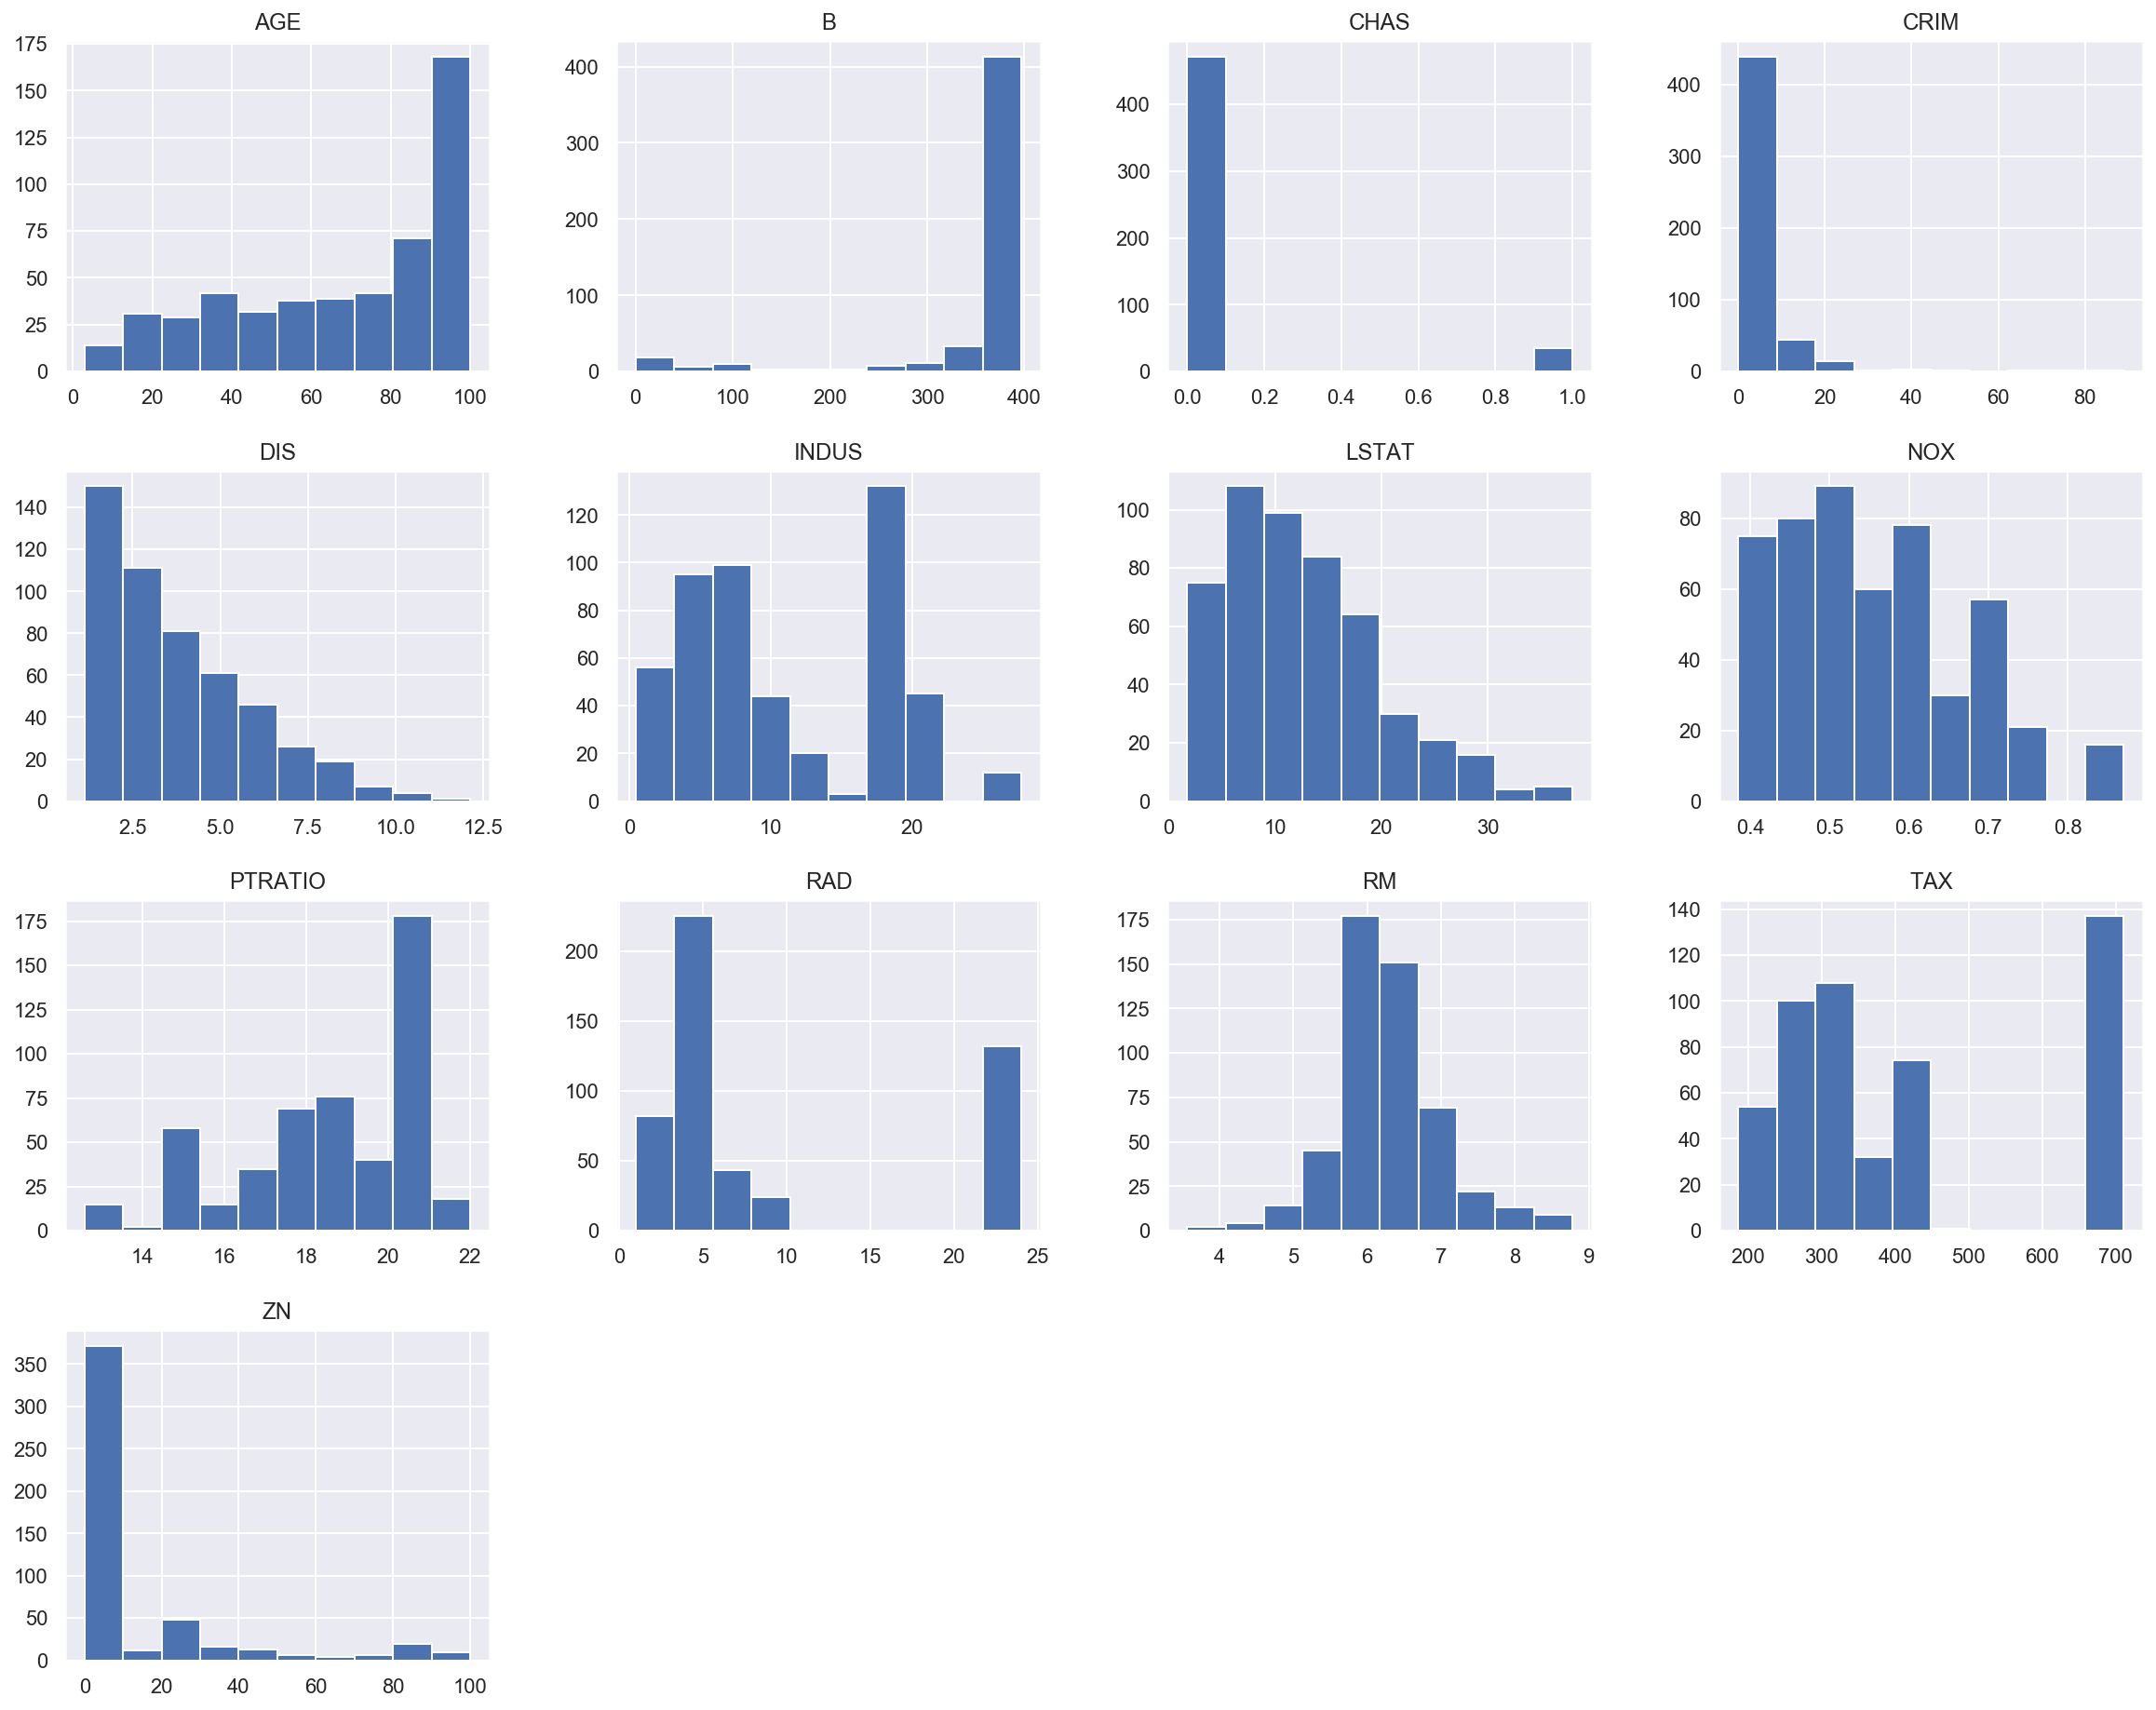

In [4]:
df.hist(figsize=(20, 16));

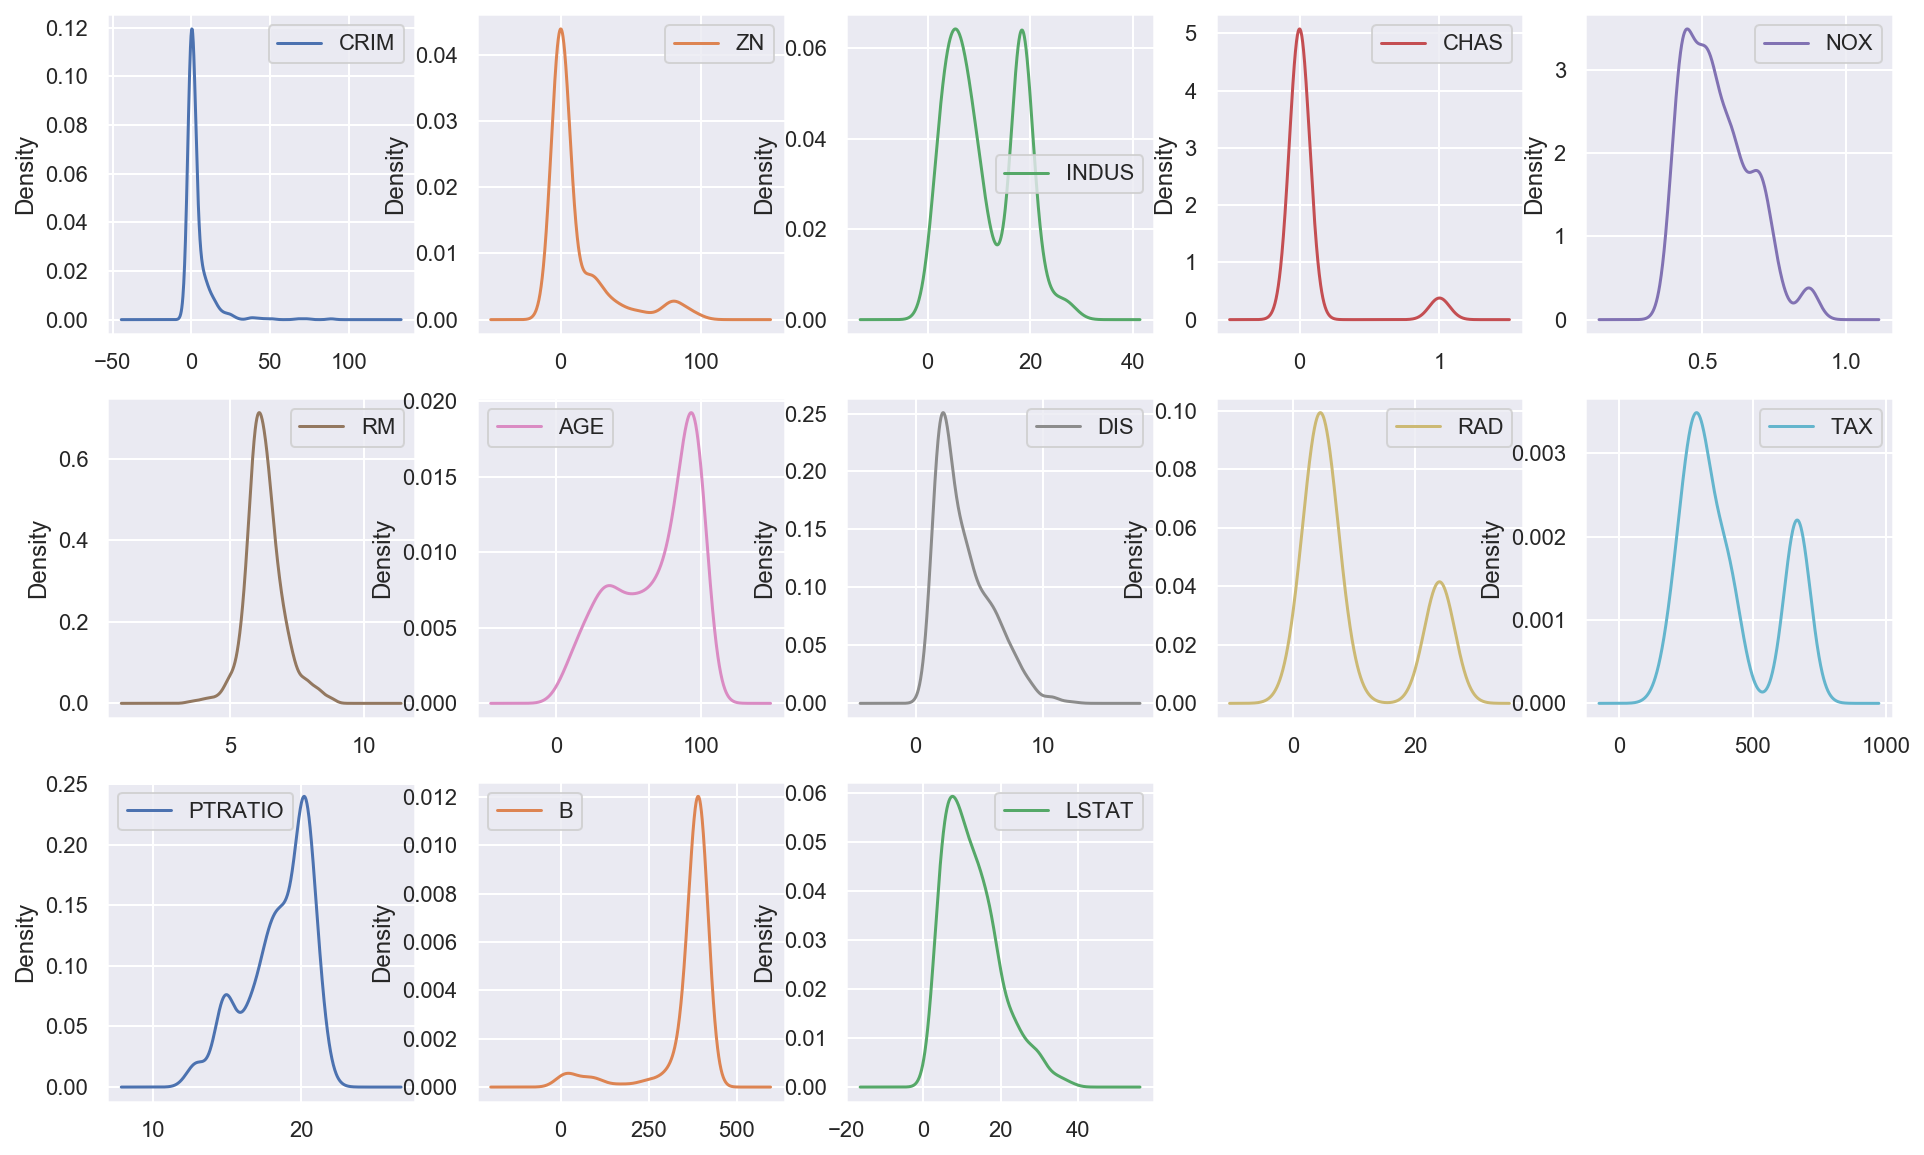

In [5]:
df.plot(
    kind='density', subplots=True, layout=(3, 5), sharex=False, figsize=(16, 10)
);

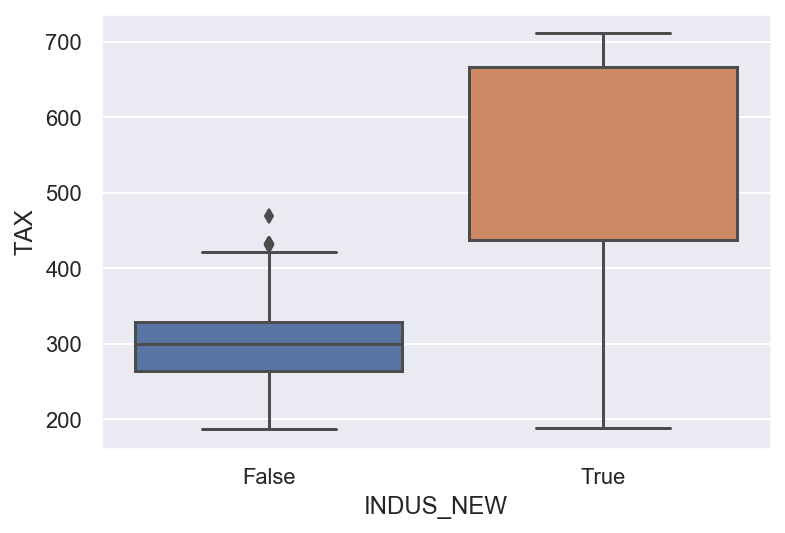

In [6]:
# sns тоже используем. y обязан быть малочисленным. Можно без y, тогда boxplot выйдет горизонтальным
# если не использовать параметр orient ('v', 'h'), конечно

df['INDUS_NEW'] = df['INDUS'] > 15
sns.boxplot(x='INDUS_NEW', y='TAX', data=df);

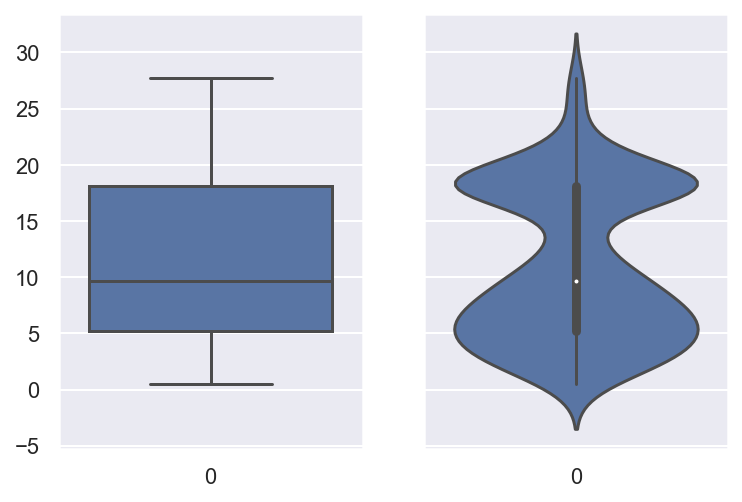

In [7]:
# violin plot!

_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['INDUS'], ax=axes[0])
sns.violinplot(data=df['INDUS'], ax=axes[1]);

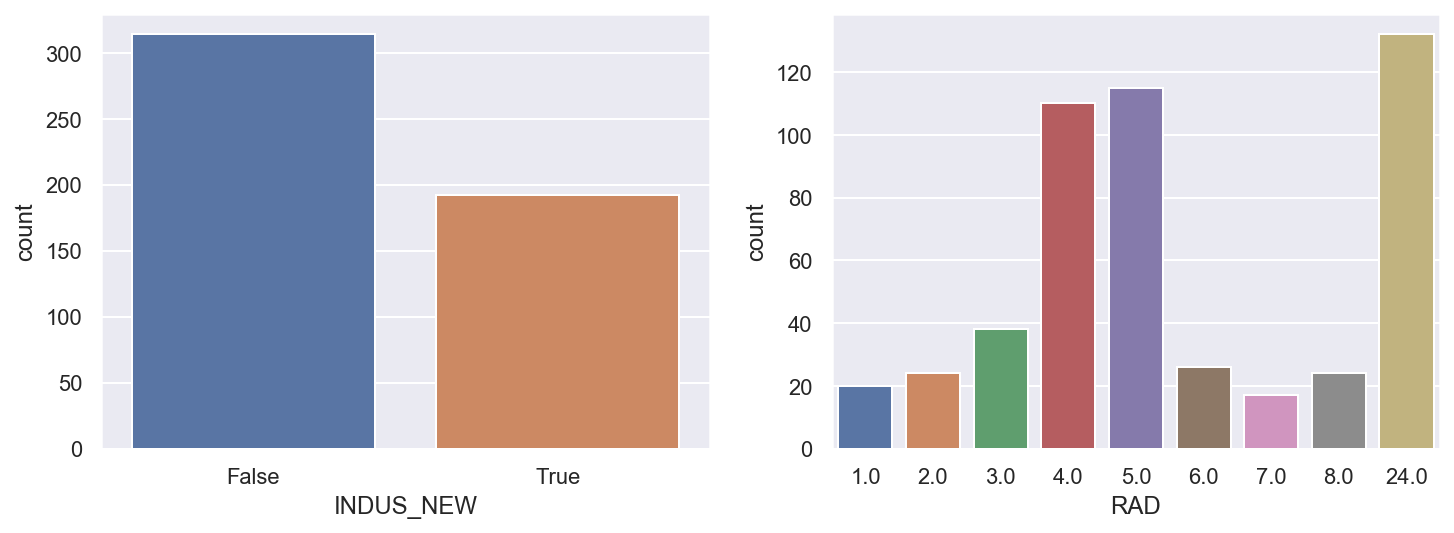

In [8]:
# На самом деле хорошо для категориальных

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='INDUS_NEW', data=df, ax=axes[0])
sns.countplot(x='RAD', data=df, ax=axes[1]);

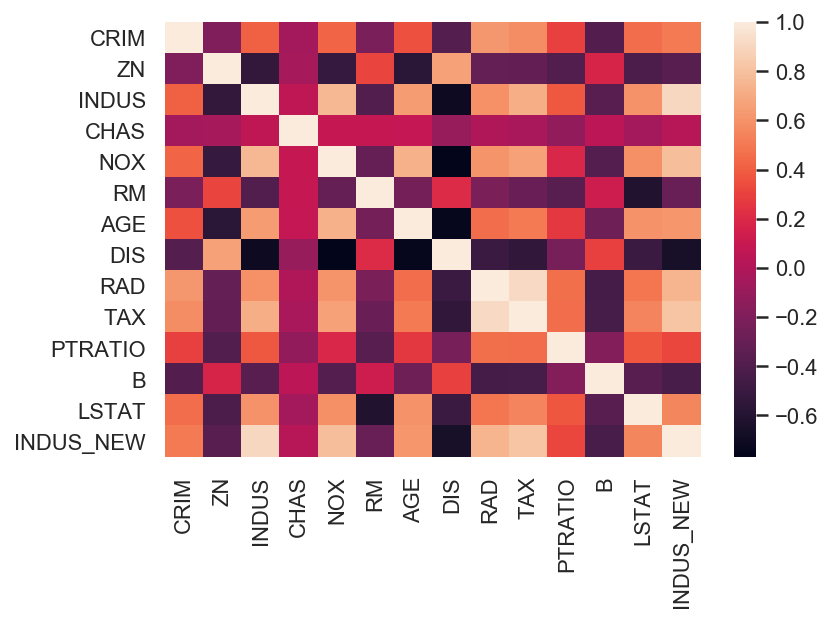

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix);

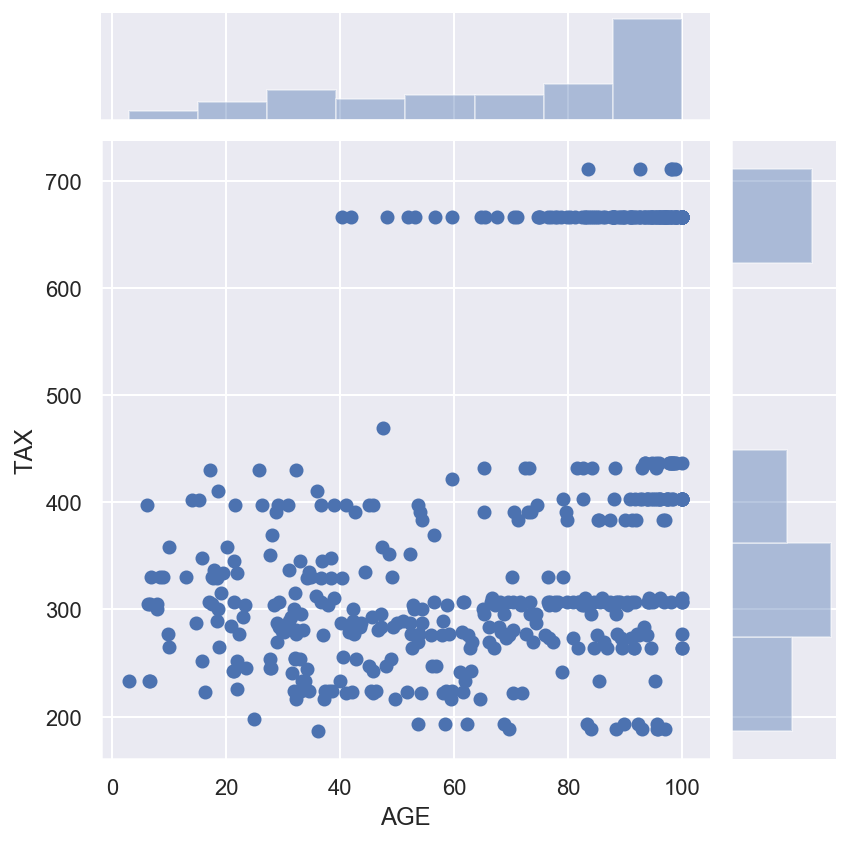

In [10]:
# Обычный scatterplot не очень интересен, посмотрит продвинутый

sns.jointplot(x='AGE', y='TAX', data=df, kind="scatter");

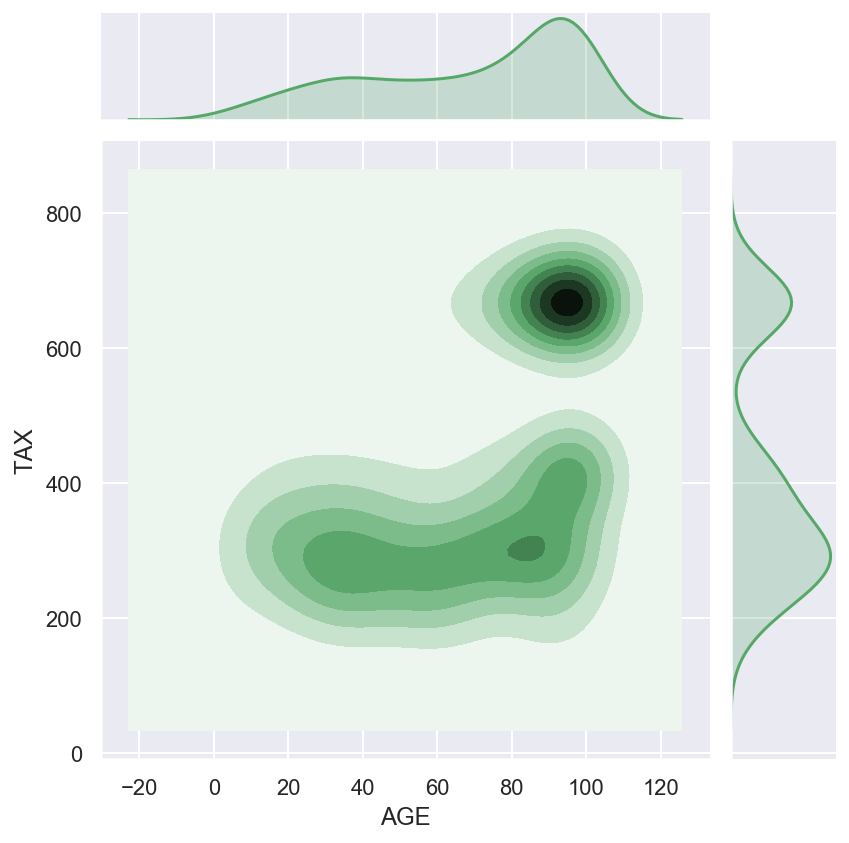

In [11]:
sns.jointplot(x='AGE', y='TAX', data=df, kind='kde', color='g');

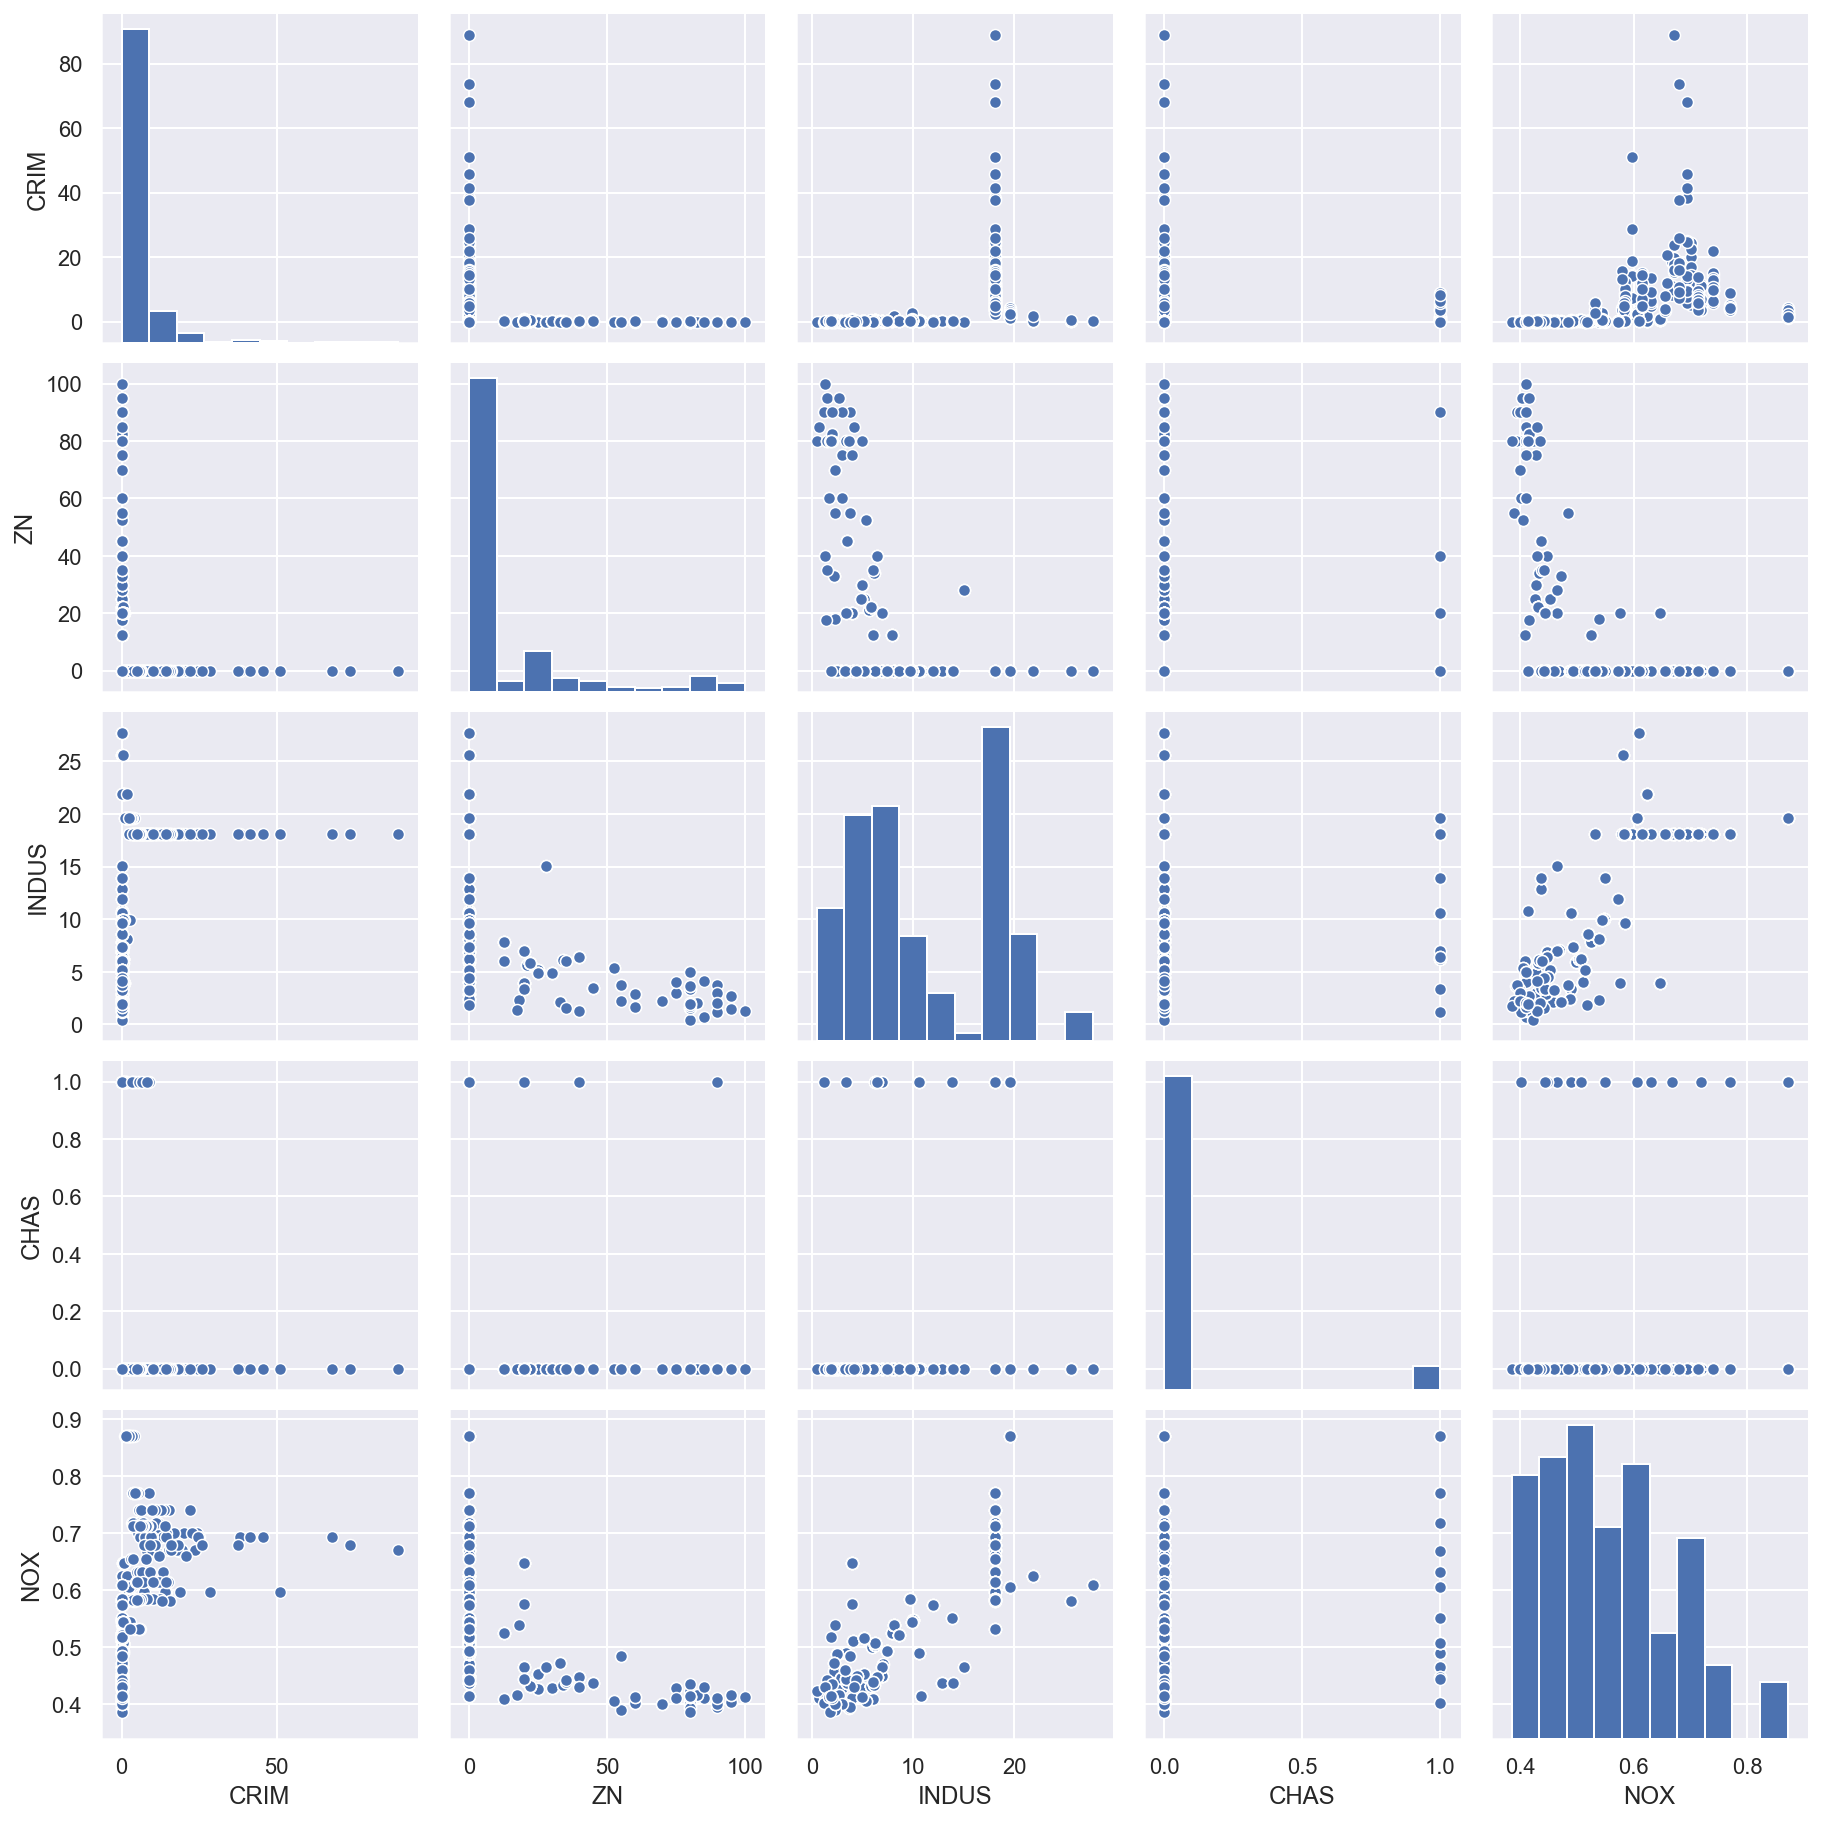

In [12]:
sns.pairplot(df[df.columns[:5]]);

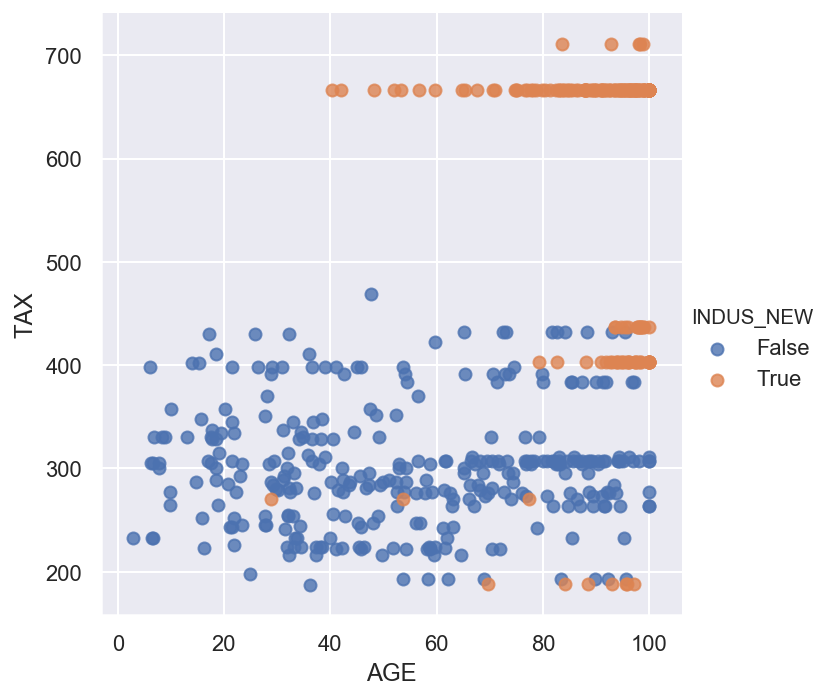

In [13]:
sns.lmplot(
    'AGE', 'TAX', data=df, hue='INDUS_NEW', fit_reg=False
);

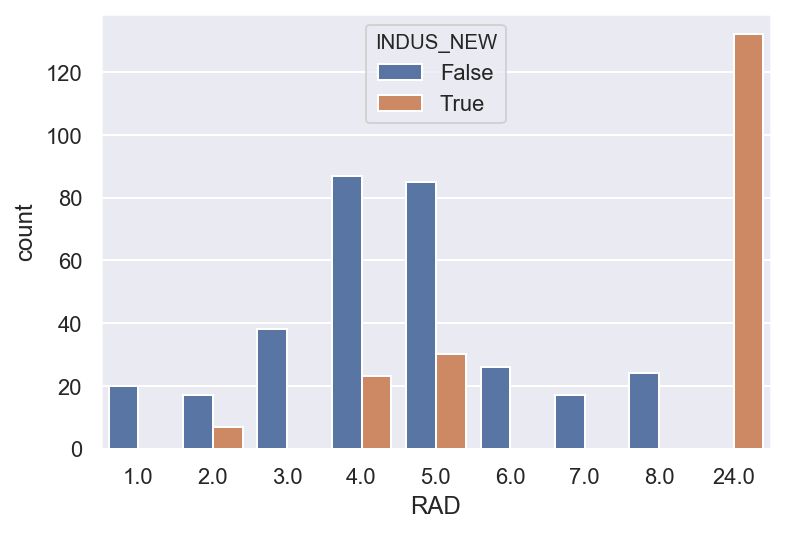

In [14]:
sns.countplot(x='RAD', hue='INDUS_NEW', data=df);

In [15]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [16]:
X = df.drop('INDUS_NEW', axis=1)

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

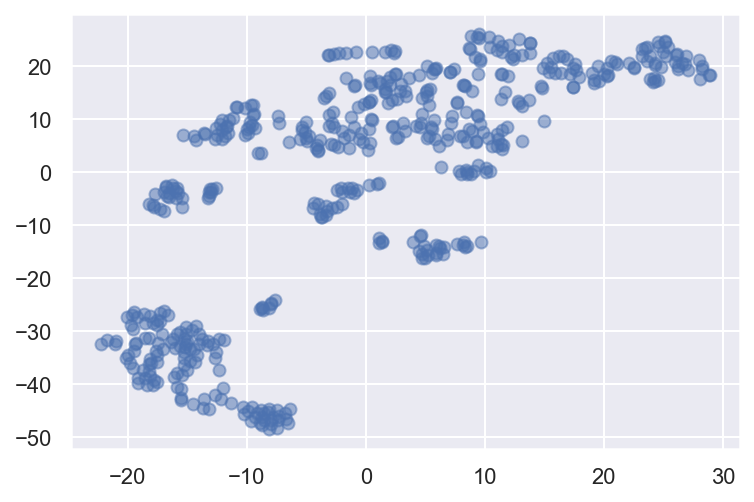

In [19]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

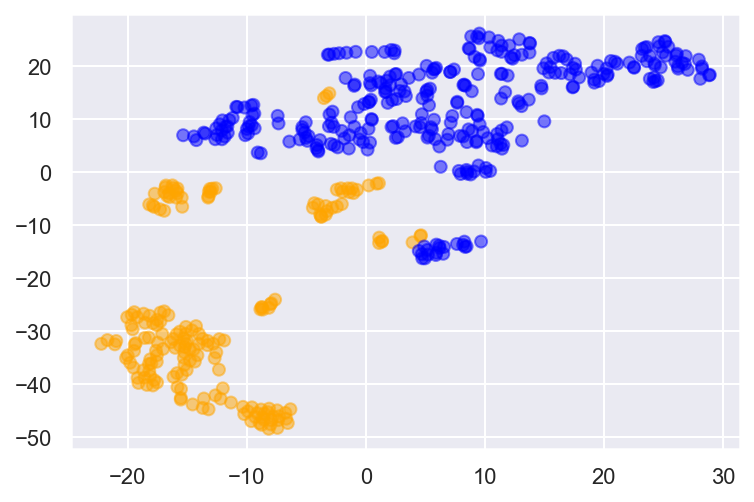

In [20]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df['INDUS_NEW'].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

In [21]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,INDUS_NEW
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,False
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,False
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,False
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,False
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,False
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,False
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,False


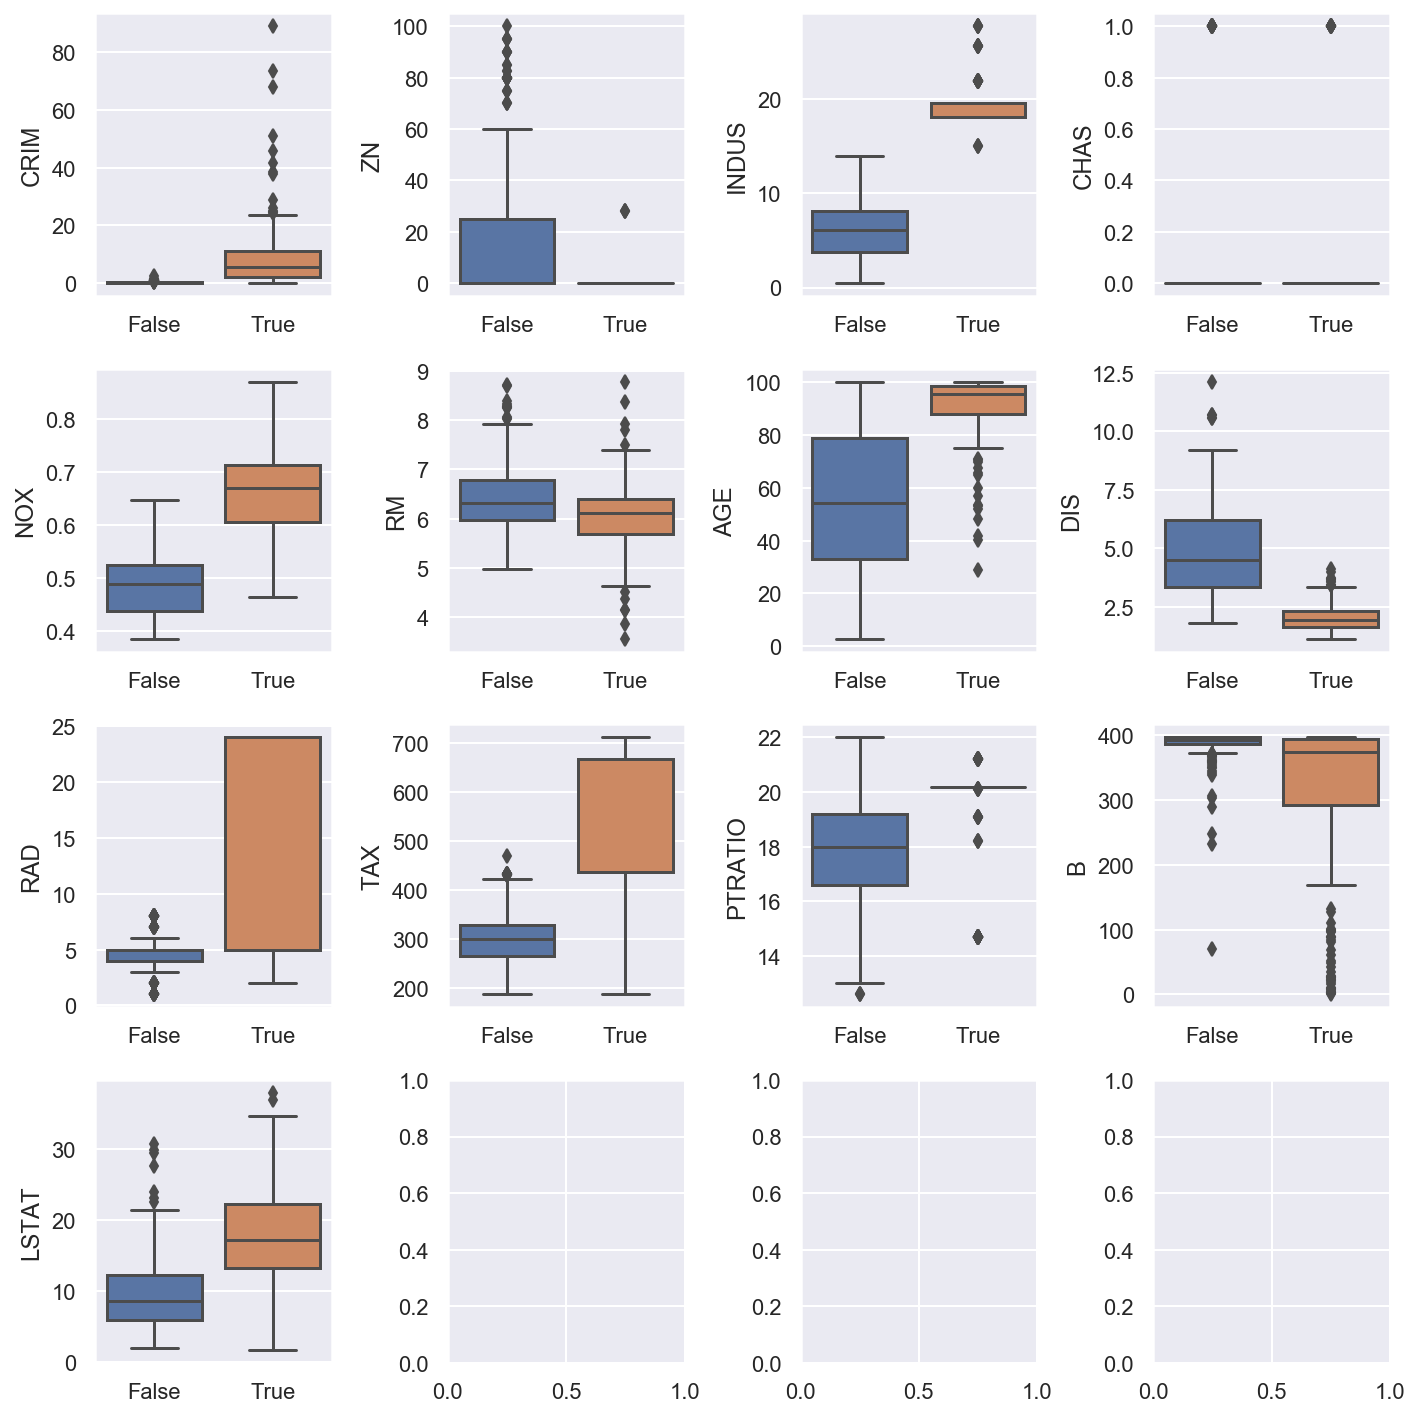

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for idx, feat in enumerate(df.columns[:-1]):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="INDUS_NEW", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

In [25]:
plt.rcParams["figure.figsize"] = 8, 5
plt.rcParams["image.cmap"] = "viridis"

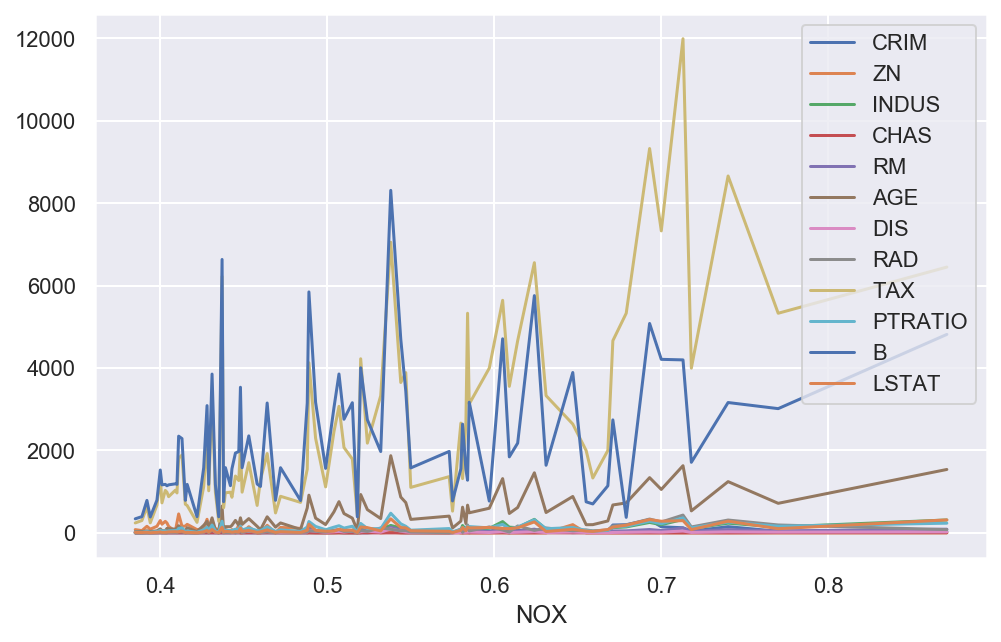

In [26]:
df[df.columns[:-1]].groupby(
    "NOX"
).sum().plot();

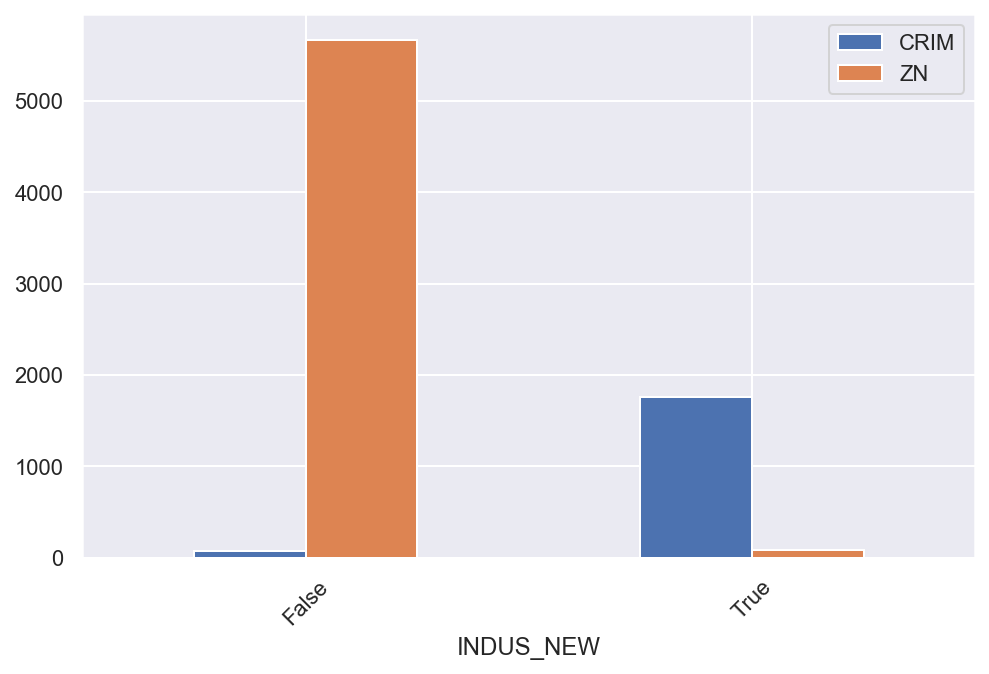

In [28]:
df[['CRIM', 'ZN', 'INDUS_NEW']].groupby(
    "INDUS_NEW"
).sum().plot(kind="bar", rot=45);

[18.1  19.58  8.14  6.2  21.89]


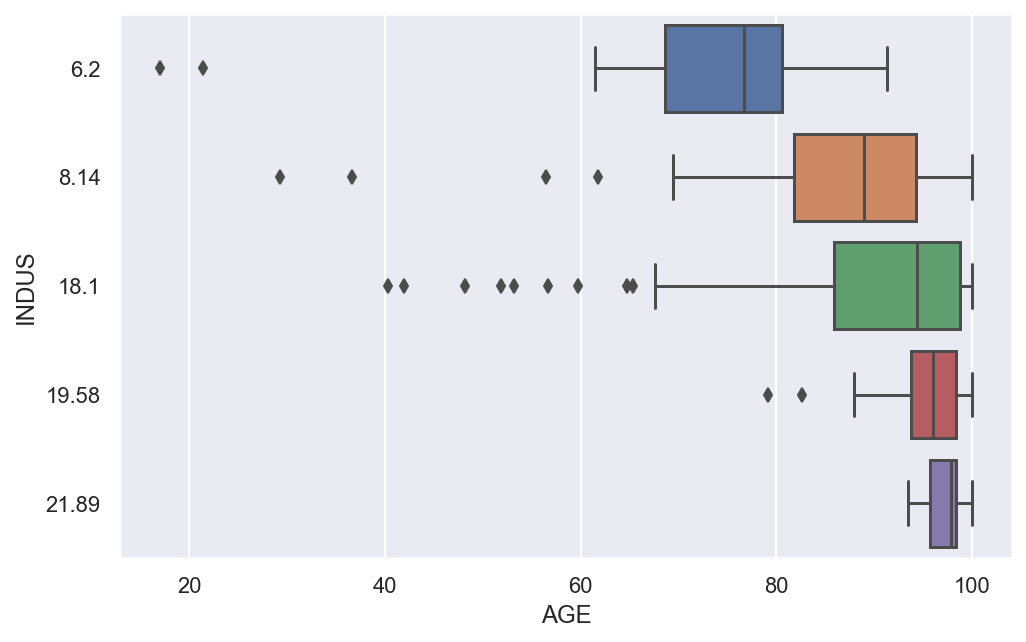

In [31]:
top_induses = (
    df["INDUS"].value_counts().sort_values(ascending=False).head(5).index.values
)
print(top_induses)
sns.boxplot(
    y="INDUS",
    x="AGE",
    data=df[df["INDUS"].isin(top_induses)],
    orient="h",
);

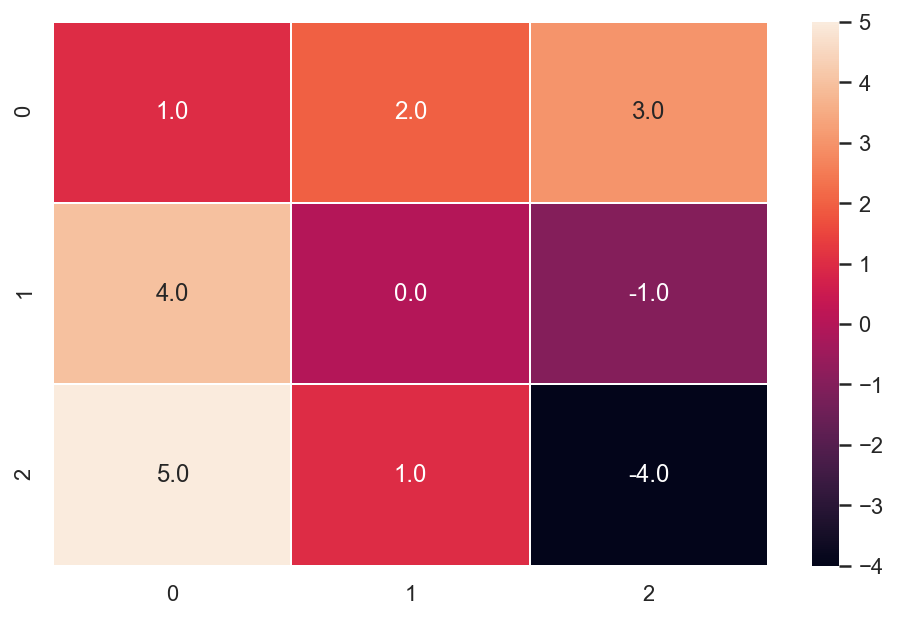

In [33]:
table = [[1, 2, 3], [4, 0, -1], [5, 1, -4]]

sns.heatmap(table, annot=True, fmt=".1f", linewidths=0.5);

In [35]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [38]:
trace0 = go.Scatter(x=df.index, y=df["PTRATIO"], name="1")

trace1 = go.Scatter(
    x=df.index, y=df["AGE"], name="2"
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {"title": "EXAMPLE"}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [39]:
plotly.offline.plot(fig, filename="example.html", show_link=False);

In [41]:
trace0 = go.Bar(x=df.index[:10], y=df["PTRATIO"][:10], name="1")

trace1 = go.Bar(
    x=df.index[:10], y=df["AGE"][:10], name="2"
)

# Get together the data and style objects
data = [trace0, trace1]
layout = {"title": "Examole2"}

# Create a `Figure` and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [44]:
data = []

# Create a box trace for each genre in our dataset
for indus_type in df.INDUS_NEW.unique():
    data.append(go.Box(y=df[df.INDUS_NEW == indus_type].AGE, name=str(indus_type)))

# Visualize
iplot(data, show_link=False)

In [ ]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [ ]:
# Calculate the correlation matrix
corr = df[['id', 'age', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 
           'gluc']].corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});